In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

## 建立物件
* 序列(陣列)
* 資料框(DataFrame)-如同Excel資料表

In [3]:
s = pd.Series([1,3,5,np.nan,6,8]) #建立一個一為陣列
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range('20180316',periods=6) #建立6個日期的陣列
dates

DatetimeIndex(['2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19',
               '2018-03-20', '2018-03-21'],
              dtype='datetime64[ns]', freq='D')

建立一個資料框(6列x4行)
* 內容隨機產生
* 列指標(index)為日期
* 行指標(columns)為A, B, C, D（欄位名稱）

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2018-03-16,0.160816,2.527033,0.293871,1.369097
2018-03-17,0.874715,0.700453,-0.722318,-0.993357
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477
2018-03-19,0.844014,-0.708118,1.001973,2.245077
2018-03-20,1.764418,-1.280253,-0.085597,-1.520259
2018-03-21,-0.083471,-1.732204,0.130521,-1.433492


運用pyhton字典資料結構建立資料框(4x6)
* 6行，欄位名稱A, B, C, D, E, F(key值)
* 第1行: 常數1.
* 第2行: 日期標記
* 第3行: pandas陣列-浮點數1，列標記為1, 2, 3, 4(range(4)產生)
* 第4行: numpy 陣列 [3]x4
* 第5行: 類別定義
* 第6行: 字串常數('foo')

In [7]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20180316'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(["test","train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2018-03-16,1.0,3,test,foo
1,1.0,2018-03-16,1.0,3,train,foo
2,1.0,2018-03-16,1.0,3,test,foo
3,1.0,2018-03-16,1.0,3,train,foo


## 檢視資料

## 選取資料

In [8]:
df['A'] #選取行

2018-03-16    0.160816
2018-03-17    0.874715
2018-03-18   -0.202739
2018-03-19    0.844014
2018-03-20    1.764418
2018-03-21   -0.083471
Freq: D, Name: A, dtype: float64

In [9]:
df[0:3] #選取列

,A,B,C,D
2018-03-16,0.160816,2.527033,0.293871,1.369097
2018-03-17,0.874715,0.700453,-0.722318,-0.993357
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477


In [10]:
df['20180317':'20180320'] #選取列範圍

,A,B,C,D
2018-03-17,0.874715,0.700453,-0.722318,-0.993357
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477
2018-03-19,0.844014,-0.708118,1.001973,2.245077
2018-03-20,1.764418,-1.280253,-0.085597,-1.520259


### 以標籤選取資料

以標記為參考的資料選取函數-DataFrame.loc()

In [11]:
df.loc[dates[1]] #選擇特定列，顯示個欄位資料

A    0.874715
B    0.700453
C   -0.722318
D   -0.993357
Name: 2018-03-17 00:00:00, dtype: float64

In [12]:
df.loc[:, ['A','B']] #選擇特定「A」及「B」兩欄位，「所有列」資料

,A,B
2018-03-16,0.160816,2.527033
2018-03-17,0.874715,0.700453
2018-03-18,-0.202739,-1.289026
2018-03-19,0.844014,-0.708118
2018-03-20,1.764418,-1.280253
2018-03-21,-0.083471,-1.732204


In [13]:
df.loc['20180319':'20180322', ['A','B']]

,A,B
2018-03-19,0.844014,-0.708118
2018-03-20,1.764418,-1.280253
2018-03-21,-0.083471,-1.732204


In [14]:
df.loc[dates[2], 'B']

-1.2890255169151124

In [15]:
df.at[dates[2],'B'] #選擇特定某一個資料，DataFrame.at()函數

-1.2890255169151124

### 以位置選取資料

In [16]:
df.iloc[3]

A    0.844014
B   -0.708118
C    1.001973
D    2.245077
Name: 2018-03-19 00:00:00, dtype: float64

In [17]:
df.iloc[3:5, 0:2]

,A,B
2018-03-19,0.844014,-0.708118
2018-03-20,1.764418,-1.280253


In [18]:
df.iloc[[1,2,4],[0,2,3]]

,A,C,D
2018-03-17,0.874715,-0.722318,-0.993357
2018-03-18,-0.202739,-2.574132,0.878477
2018-03-20,1.764418,-0.085597,-1.520259


In [19]:
df.iloc[1:3, :]

,A,B,C,D
2018-03-17,0.874715,0.700453,-0.722318,-0.993357
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477


In [20]:
df.iloc[:, 1:3]

,B,C
2018-03-16,2.527033,0.293871
2018-03-17,0.700453,-0.722318
2018-03-18,-1.289026,-2.574132
2018-03-19,-0.708118,1.001973
2018-03-20,-1.280253,-0.085597
2018-03-21,-1.732204,0.130521


In [21]:
df.iloc[1,1]

0.70045263431441518

In [22]:
df.iat[1,1]

0.70045263431441518

### 以邏輯值索引

In [23]:
df[df.A>0]

,A,B,C,D
2018-03-16,0.160816,2.527033,0.293871,1.369097
2018-03-17,0.874715,0.700453,-0.722318,-0.993357
2018-03-19,0.844014,-0.708118,1.001973,2.245077
2018-03-20,1.764418,-1.280253,-0.085597,-1.520259


In [24]:
df[df>0]

,A,B,C,D
2018-03-16,0.160816,2.527033,0.293871,1.369097
2018-03-17,0.874715,0.700453,NaN,NaN
2018-03-18,NaN,NaN,NaN,0.878477
2018-03-19,0.844014,NaN,1.001973,2.245077
2018-03-20,1.764418,NaN,NaN,NaN
2018-03-21,NaN,NaN,0.130521,NaN


In [25]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2018-03-16,0.160816,2.527033,0.293871,1.369097,one
2018-03-17,0.874715,0.700453,-0.722318,-0.993357,one
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477,two
2018-03-19,0.844014,-0.708118,1.001973,2.245077,three
2018-03-20,1.764418,-1.280253,-0.085597,-1.520259,four
2018-03-21,-0.083471,-1.732204,0.130521,-1.433492,three


In [26]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-03-18,-0.202739,-1.289026,-2.574132,0.878477,two
2018-03-20,1.764418,-1.280253,-0.085597,-1.520259,four


### 資料內容設定

In [27]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180327', periods=6))
s1

2018-03-27    1
2018-03-28    2
2018-03-29    3
2018-03-30    4
2018-03-31    5
2018-04-01    6
Freq: D, dtype: int64

In [28]:
df.at[dates[1], 'A'] = 0

In [29]:
df.iat[0,1] = 0

In [30]:
df.loc[:,'D'] = np.array([5]*len(df))

In [31]:
df

,A,B,C,D
2018-03-16,0.160816,0.000000,0.293871,5
2018-03-17,0.000000,0.700453,-0.722318,5
2018-03-18,-0.202739,-1.289026,-2.574132,5
2018-03-19,0.844014,-0.708118,1.001973,5
2018-03-20,1.764418,-1.280253,-0.085597,5
2018-03-21,-0.083471,-1.732204,0.130521,5


In [32]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D
2018-03-16,-0.160816,0.000000,-0.293871,-5
2018-03-17,0.000000,-0.700453,-0.722318,-5
2018-03-18,-0.202739,-1.289026,-2.574132,-5
2018-03-19,-0.844014,-0.708118,-1.001973,-5
2018-03-20,-1.764418,-1.280253,-0.085597,-5
2018-03-21,-0.083471,-1.732204,-0.130521,-5


### 遺漏值

In [33]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])

In [34]:
df1.loc[dates[0]:dates[1], 'E']=1

In [35]:
df1

,A,B,C,D,E
2018-03-16,0.160816,0.000000,0.293871,5,1.0
2018-03-17,0.000000,0.700453,-0.722318,5,1.0
2018-03-18,-0.202739,-1.289026,-2.574132,5,NaN
2018-03-19,0.844014,-0.708118,1.001973,5,NaN


In [36]:
df1.dropna(how='any')

,A,B,C,D,E
2018-03-16,0.160816,0.000000,0.293871,5,1.0
2018-03-17,0.000000,0.700453,-0.722318,5,1.0


In [37]:
df1.fillna(value=6)

,A,B,C,D,E
2018-03-16,0.160816,0.000000,0.293871,5,1.0
2018-03-17,0.000000,0.700453,-0.722318,5,1.0
2018-03-18,-0.202739,-1.289026,-2.574132,5,6.0
2018-03-19,0.844014,-0.708118,1.001973,5,6.0


In [38]:
pd.isna(df1)

AttributeError: module 'pandas' has no attribute 'isna'

### 資料操作

* 統計操作

In [39]:
df

,A,B,C,D
2018-03-16,0.160816,0.000000,0.293871,5
2018-03-17,0.000000,0.700453,-0.722318,5
2018-03-18,-0.202739,-1.289026,-2.574132,5
2018-03-19,0.844014,-0.708118,1.001973,5
2018-03-20,1.764418,-1.280253,-0.085597,5
2018-03-21,-0.083471,-1.732204,0.130521,5


In [40]:
df.mean()

A    0.413840
B   -0.718191
C   -0.325947
D    5.000000
dtype: float64

In [41]:
df.mean(1)

2018-03-16    1.363672
2018-03-17    1.244534
2018-03-18    0.233526
2018-03-19    1.534467
2018-03-20    1.349642
2018-03-21    0.828712
Freq: D, dtype: float64

In [42]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2018-03-16    NaN
2018-03-17    NaN
2018-03-18    1.0
2018-03-19    3.0
2018-03-20    5.0
2018-03-21    NaN
Freq: D, dtype: float64

In [43]:
df.sub(s, axis='index')

,A,B,C,D
2018-03-16,NaN,NaN,NaN,NaN
2018-03-17,NaN,NaN,NaN,NaN
2018-03-18,-1.202739,-2.289026,-3.574132,4.0
2018-03-19,-2.155986,-3.708118,-1.998027,2.0
2018-03-20,-3.235582,-6.280253,-5.085597,0.0
2018-03-21,NaN,NaN,NaN,NaN


* Apply

In [44]:
df.apply(np.cumsum)

,A,B,C,D
2018-03-16,0.160816,0.000000,0.293871,5
2018-03-17,0.160816,0.700453,-0.428447,10
2018-03-18,-0.041924,-0.588573,-3.002579,15
2018-03-19,0.802090,-1.296690,-2.000606,20
2018-03-20,2.566508,-2.576943,-2.086203,25
2018-03-21,2.483038,-4.309147,-1.955681,30


In [ ]:
df.apply(lambda x: x.max() - x.min())

* Histogramming

In [45]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    5
1    2
2    1
3    2
4    1
5    4
6    4
7    1
8    0
9    6
dtype: int64

In [46]:
s.value_counts()

1    3
4    2
2    2
6    1
5    1
0    1
dtype: int64

* 字串操作

In [47]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

* 合併

In [48]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.226193,1.189846,0.847976,-0.463072
1,1.530323,0.493505,0.462822,-0.014627
2,-0.209498,0.375225,0.401636,1.381940
3,-1.519532,-0.013022,1.383769,0.903396
4,-0.081253,0.158441,-0.088829,0.890562
5,-0.796833,-0.278424,-0.554380,0.823229
6,-0.102458,-0.188196,-1.070662,-0.213712
7,1.087961,-0.197472,0.074779,-0.273176
8,-0.940375,-1.623229,0.756050,0.300319
9,0.606800,1.365376,-0.903527,-1.427063


In [49]:
piece = [df[0:3], df[2:5], df[7:]]

In [ ]:
pd.concat(piece)

* 結合

In [50]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval':[1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval':[4,5]})

In [53]:
left

,key,lval
0,foo,1
1,bar,2


In [54]:
right

,key,rval
0,foo,4
1,bar,5


In [55]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


* Append

In [56]:
df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,1.229258,-1.384452,-0.406938,-0.636200
1,-0.510418,-0.663422,-0.239729,0.550612
2,-0.769223,-0.596169,-0.536933,-0.312848
3,-0.647913,-0.300083,-1.522686,0.590654
4,0.174496,-0.788197,-2.066040,-0.665594
5,-0.079105,-0.405112,-0.953796,-1.862545
6,0.984109,-0.327682,-0.067877,-0.402676
7,-1.110375,0.961454,0.677860,1.779271


In [58]:
s = df.iloc[3]
s

A   -0.647913
B   -0.300083
C   -1.522686
D    0.590654
Name: 3, dtype: float64

In [59]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.229258,-1.384452,-0.406938,-0.636200
1,-0.510418,-0.663422,-0.239729,0.550612
2,-0.769223,-0.596169,-0.536933,-0.312848
3,-0.647913,-0.300083,-1.522686,0.590654
4,0.174496,-0.788197,-2.066040,-0.665594
5,-0.079105,-0.405112,-0.953796,-1.862545
6,0.984109,-0.327682,-0.067877,-0.402676
7,-1.110375,0.961454,0.677860,1.779271
8,-0.647913,-0.300083,-1.522686,0.590654


In [60]:
df = pd.DataFrame({
    'A':['foo',  'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,0.666865,0.103406
1,bar,one,-1.525728,-1.362651
2,foo,two,-0.428033,-0.327248
3,bar,three,-1.431769,0.848752
4,foo,two,0.471699,-1.679322
5,bar,two,0.841472,0.121316
6,foo,one,0.665969,0.163586
7,foo,three,-0.724004,0.011930


In [61]:
df.groupby("A").sum()

,C,D
A,,
bar,-2.116025,-0.392583
foo,0.652496,-1.727649


In [62]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.525728 -1.362651
    three -1.431769  0.848752
    two    0.841472  0.121316
foo one    1.332834  0.266991
    three -0.724004  0.011930
    two    0.043667 -2.006570

* 重塑形狀

In [63]:
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']
]))

In [64]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [65]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [66]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [67]:
df

A         B
first second                    
bar   one     0.025357  0.366682
      two    -0.889499  1.377849
baz   one     0.149481 -2.218202
      two     0.927086  0.067912
foo   one    -1.076807  0.727287
      two     0.321411 -2.031667
qux   one     0.083190 -0.157721
      two    -0.209615  2.252918

In [68]:
df2 = df[:4]

In [69]:
df2

A         B
first second                    
bar   one     0.025357  0.366682
      two    -0.889499  1.377849
baz   one     0.149481 -2.218202
      two     0.927086  0.067912

In [70]:
stacked = df2.stack()

In [71]:
stacked

first  second   
bar    one     A    0.025357
               B    0.366682
       two     A   -0.889499
               B    1.377849
baz    one     A    0.149481
               B   -2.218202
       two     A    0.927086
               B    0.067912
dtype: float64

In [72]:
stacked.unstack()

A         B
first second                    
bar   one     0.025357  0.366682
      two    -0.889499  1.377849
baz   one     0.149481 -2.218202
      two     0.927086  0.067912

In [73]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.025357 -0.889499
      B  0.366682  1.377849
baz   A  0.149481  0.927086
      B -2.218202  0.067912

In [74]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.025357  0.149481
       B  0.366682 -2.218202
two    A -0.889499  0.927086
       B  1.377849  0.067912

* pivot Tables

In [75]:
df = pd.DataFrame({
    'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)
})

In [76]:
df

,A,B,C,D,E
0,one,A,foo,-0.729896,0.774352
1,one,B,foo,-0.380613,1.792264
2,two,C,foo,0.183524,-1.154514
3,three,A,bar,0.154714,0.118262
4,one,B,bar,0.494463,-1.002510
5,one,C,bar,-1.005956,-0.271873
6,two,A,foo,0.481468,-0.456640
7,three,B,foo,-0.906866,-0.317530
8,one,C,foo,0.831762,1.262781
9,one,A,bar,-0.918092,1.549619


In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.918092 -0.729896
      B  0.494463 -0.380613
      C -1.005956  0.831762
three A  0.154714       NaN
      B       NaN -0.906866
      C -0.159697       NaN
two   A       NaN  0.481468
      B  0.780097       NaN
      C       NaN  0.183524

### 時間序列

In [78]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [79]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [80]:
ts

2012-01-01 00:00:00    267
2012-01-01 00:00:01    225
2012-01-01 00:00:02    248
2012-01-01 00:00:03    340
2012-01-01 00:00:04    494
2012-01-01 00:00:05    493
2012-01-01 00:00:06    412
2012-01-01 00:00:07    351
2012-01-01 00:00:08    493
2012-01-01 00:00:09    116
2012-01-01 00:00:10    275
2012-01-01 00:00:11    482
2012-01-01 00:00:12    479
2012-01-01 00:00:13     28
2012-01-01 00:00:14    466
2012-01-01 00:00:15    286
2012-01-01 00:00:16     33
2012-01-01 00:00:17    355
2012-01-01 00:00:18    312
2012-01-01 00:00:19    465
2012-01-01 00:00:20    471
2012-01-01 00:00:21     48
2012-01-01 00:00:22     84
2012-01-01 00:00:23     25
2012-01-01 00:00:24    485
2012-01-01 00:00:25    347
2012-01-01 00:00:26    485
2012-01-01 00:00:27     90
2012-01-01 00:00:28    144
2012-01-01 00:00:29    255
                      ... 
2012-01-01 00:01:10    465
2012-01-01 00:01:11    206
2012-01-01 00:01:12     73
2012-01-01 00:01:13    183
2012-01-01 00:01:14    252
2012-01-01 00:01:15    499
2

In [81]:
ts.resample('5Min').sum()

2012-01-01    25971
Freq: 5T, dtype: int64

In [82]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.908925
2012-03-07    0.958240
2012-03-08    0.057476
2012-03-09    1.419795
2012-03-10   -0.328213
Freq: D, dtype: float64

In [83]:
ts.utc = ts.tz_localize('UTC')
ts.utc

2012-03-06 00:00:00+00:00    1.908925
2012-03-07 00:00:00+00:00    0.958240
2012-03-08 00:00:00+00:00    0.057476
2012-03-09 00:00:00+00:00    1.419795
2012-03-10 00:00:00+00:00   -0.328213
Freq: D, dtype: float64

In [84]:
ts.utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.908925
2012-03-06 19:00:00-05:00    0.958240
2012-03-07 19:00:00-05:00    0.057476
2012-03-08 19:00:00-05:00    1.419795
2012-03-09 19:00:00-05:00   -0.328213
Freq: D, dtype: float64

In [85]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.589952
2012-02-29   -1.839338
2012-03-31   -0.212737
2012-04-30    0.724491
2012-05-31    1.117347
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2012-01    2.589952
2012-02   -1.839338
2012-03   -0.212737
2012-04    0.724491
2012-05    1.117347
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2012-01-01    2.589952
2012-02-01   -1.839338
2012-03-01   -0.212737
2012-04-01    0.724491
2012-05-01    1.117347
Freq: MS, dtype: float64

In [88]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [89]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [90]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [91]:
ts.head()

1990-03-01 09:00    1.037848
1990-06-01 09:00   -0.035920
1990-09-01 09:00    0.068114
1990-12-01 09:00   -0.124601
1991-03-01 09:00    1.205738
Freq: H, dtype: float64

### 類別

In [92]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":['a','b','b','a','a','e']
})

In [93]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [94]:
df["grade"]=df["raw_grade"].astype("category")

In [95]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [96]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [97]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [98]:
df["grade"]=df["grade"].cat.set_categories([
    "very bad", "bad", "medium", "good", "very good"
])

In [99]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [100]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [102]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 繪圖

In [103]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2014', periods=1000))

In [104]:
ts

2014-01-01   -0.539736
2014-01-02    1.830924
2014-01-03   -0.121725
2014-01-04    0.042672
2014-01-05    0.927810
2014-01-06    0.637599
2014-01-07   -0.056534
2014-01-08    0.049694
2014-01-09    1.295585
2014-01-10   -0.731746
2014-01-11   -0.884790
2014-01-12   -0.433945
2014-01-13    2.933680
2014-01-14   -0.169993
2014-01-15    0.063304
2014-01-16    0.150205
2014-01-17   -1.123179
2014-01-18    0.431940
2014-01-19    0.354419
2014-01-20   -1.371453
2014-01-21   -0.394342
2014-01-22   -1.071573
2014-01-23    2.225542
2014-01-24    0.303842
2014-01-25    0.768070
2014-01-26   -1.739763
2014-01-27    0.339354
2014-01-28    0.602110
2014-01-29   -1.639914
2014-01-30   -0.044568
                ...   
2016-08-28   -0.514154
2016-08-29   -0.329573
2016-08-30   -0.810238
2016-08-31   -0.548611
2016-09-01    0.150505
2016-09-02   -1.678936
2016-09-03   -0.602947
2016-09-04   -0.562372
2016-09-05    1.393140
2016-09-06    0.142618
2016-09-07    0.005548
2016-09-08   -0.052592
2016-09-09 

In [105]:
ts = ts.cumsum()

In [106]:
ts

2014-01-01   -0.539736
2014-01-02    1.291188
2014-01-03    1.169463
2014-01-04    1.212136
2014-01-05    2.139946
2014-01-06    2.777545
2014-01-07    2.721011
2014-01-08    2.770705
2014-01-09    4.066290
2014-01-10    3.334544
2014-01-11    2.449753
2014-01-12    2.015808
2014-01-13    4.949488
2014-01-14    4.779495
2014-01-15    4.842799
2014-01-16    4.993005
2014-01-17    3.869826
2014-01-18    4.301766
2014-01-19    4.656184
2014-01-20    3.284731
2014-01-21    2.890389
2014-01-22    1.818816
2014-01-23    4.044357
2014-01-24    4.348200
2014-01-25    5.116269
2014-01-26    3.376506
2014-01-27    3.715860
2014-01-28    4.317970
2014-01-29    2.678057
2014-01-30    2.633488
                ...   
2016-08-28    3.936952
2016-08-29    3.607379
2016-08-30    2.797142
2016-08-31    2.248531
2016-09-01    2.399036
2016-09-02    0.720099
2016-09-03    0.117152
2016-09-04   -0.445220
2016-09-05    0.947920
2016-09-06    1.090537
2016-09-07    1.096085
2016-09-08    1.043493
2016-09-09 

<IPython.core.display.Javascript object>


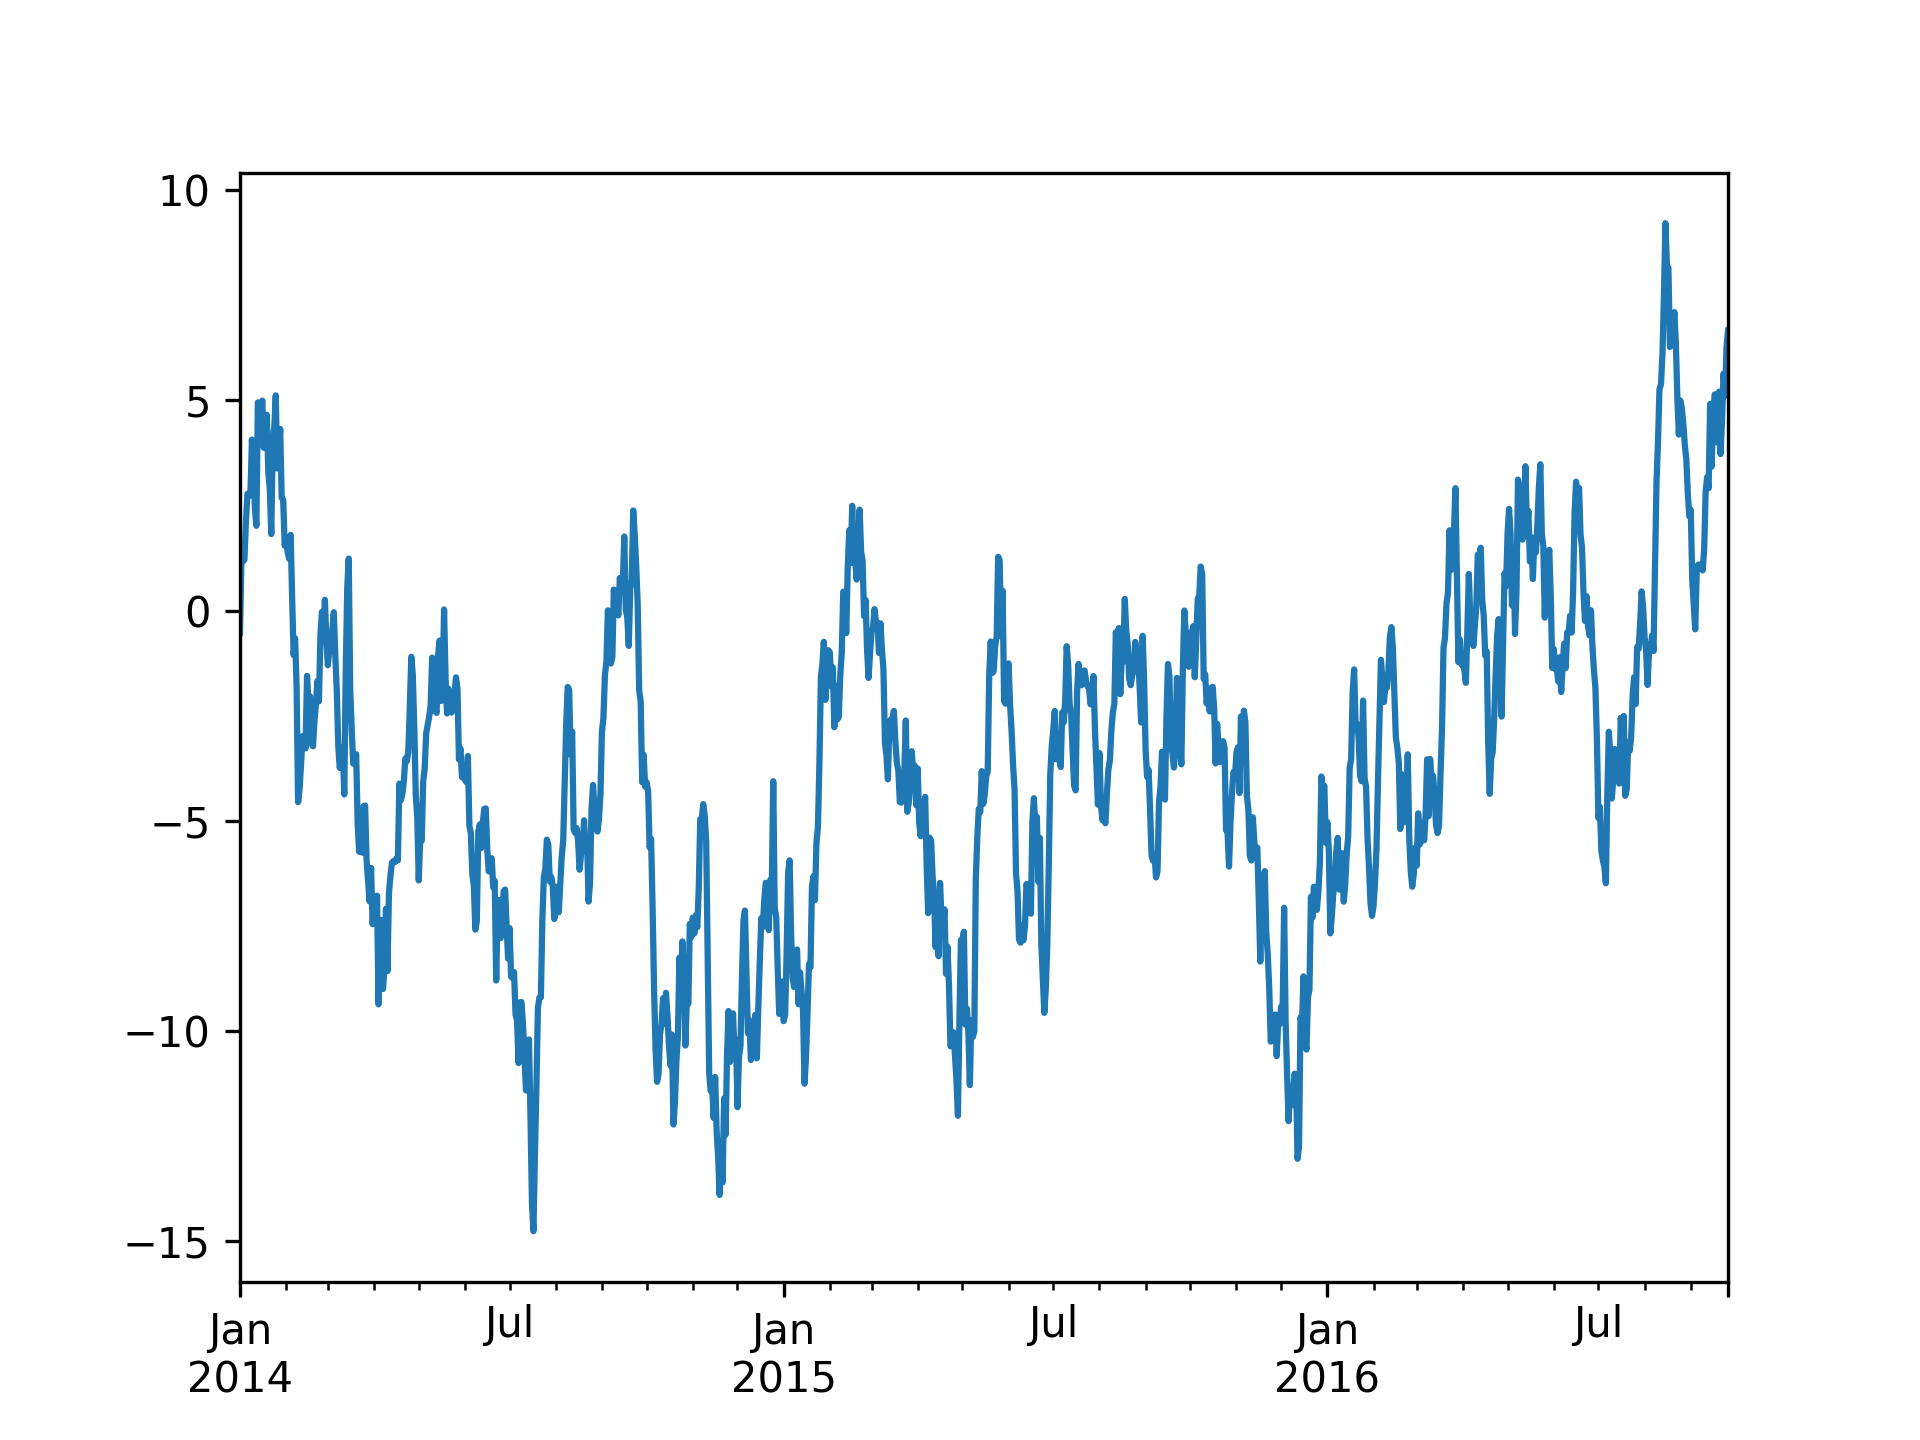

In [113]:
ts.plot()

In [114]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

<IPython.core.display.Javascript object>


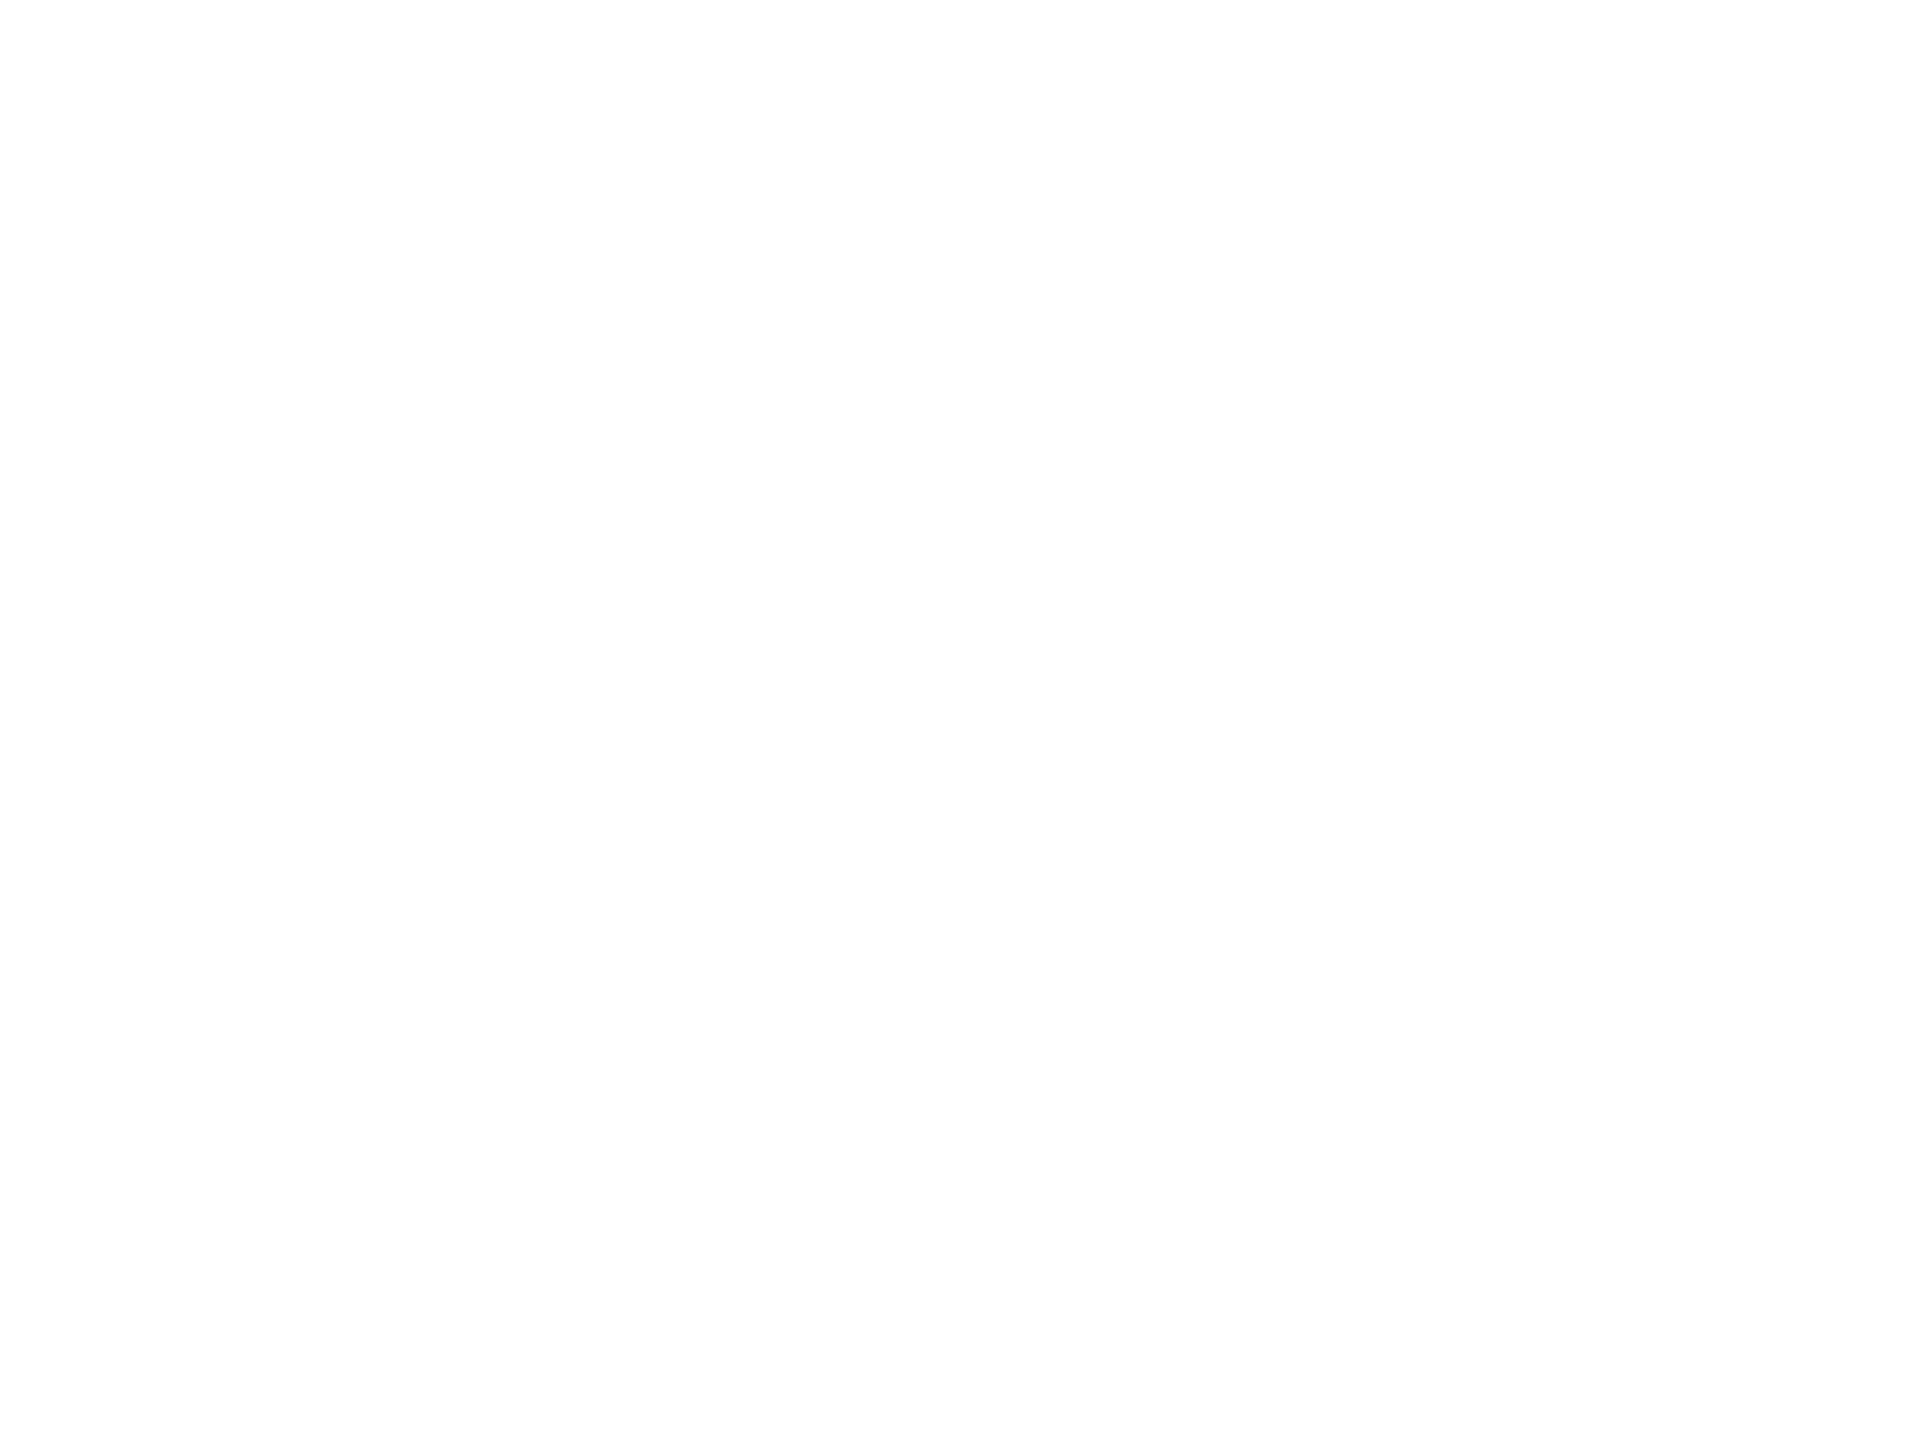

<IPython.core.display.Javascript object>


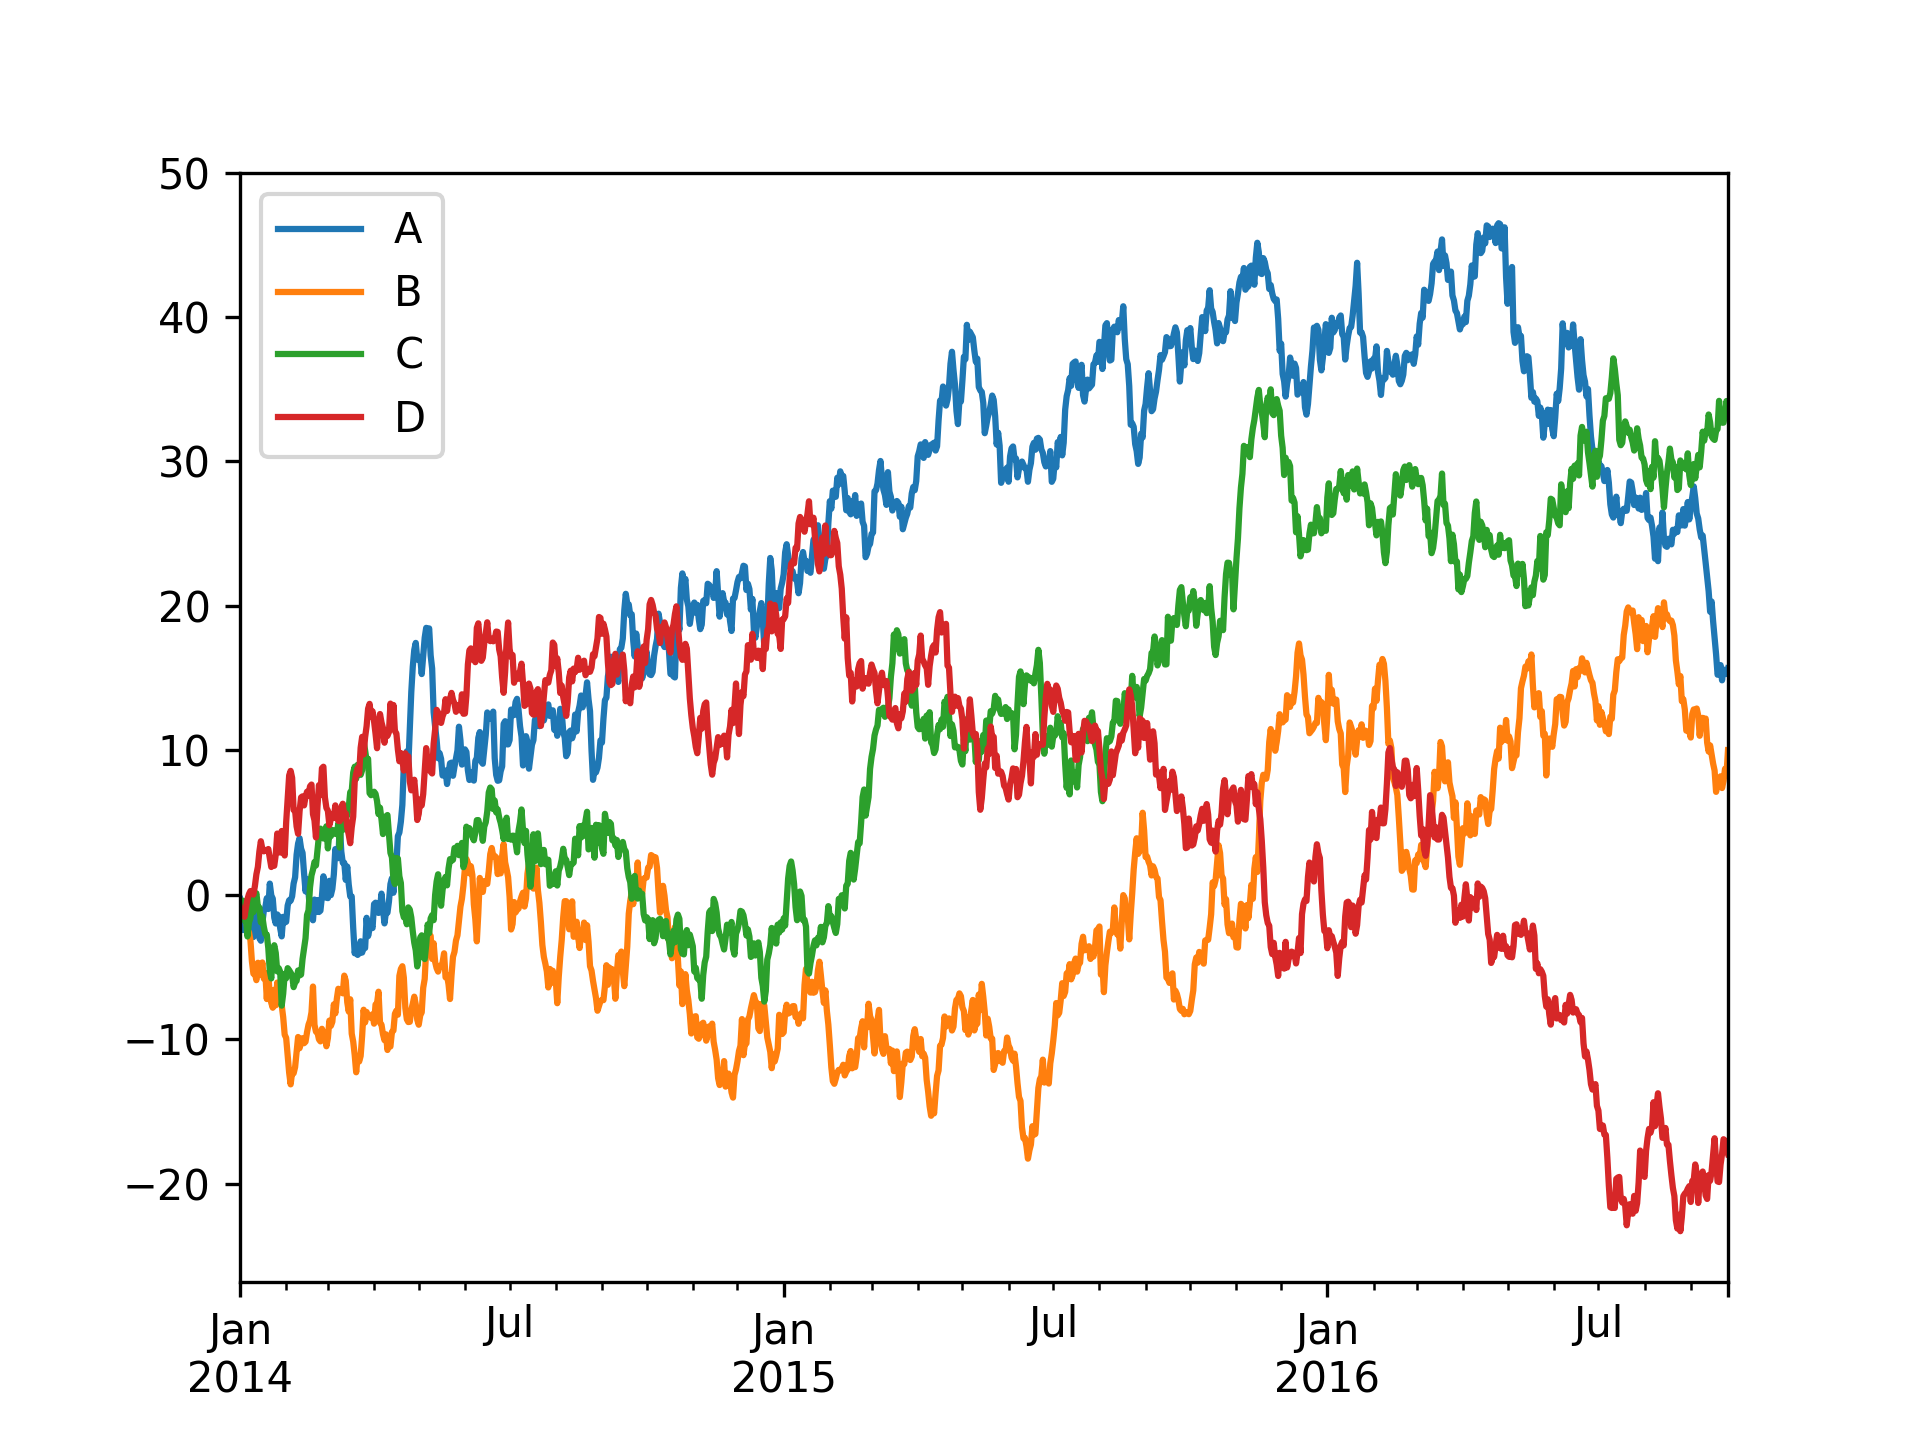

In [115]:
plt.figure(); df.plot(); plt.legend(loc='best')

### 資料檔案I/O

* CSV檔

In [116]:
df

,A,B,C,D
2014-01-01,-0.291552,-1.481745,-0.472239,-0.878597
2014-01-02,-1.199563,-1.355208,-0.444301,-1.246985
2014-01-03,-2.448142,-1.218701,-0.410885,-1.021519
2014-01-04,-0.685329,-1.223142,-1.780710,-1.527270
2014-01-05,-1.075039,-1.164568,-1.482230,-0.885271
2014-01-06,-1.946931,-2.566321,-2.888501,-0.316695
2014-01-07,-0.907965,-2.582683,-1.925013,0.041885
2014-01-08,-1.322736,-3.153998,-1.608080,0.255224
2014-01-09,-2.585194,-4.613192,0.032300,0.119394
2014-01-10,-2.930152,-5.469372,-1.203708,0.010121


In [117]:
df.to_csv('xxx.csv')

In [118]:
dfxxx = pd.read_csv('xxx.csv')

In [119]:
dfxxx

,Unnamed: 0,A,B,C,D
0,2014-01-01,-0.291552,-1.481745,-0.472239,-0.878597
1,2014-01-02,-1.199563,-1.355208,-0.444301,-1.246985
2,2014-01-03,-2.448142,-1.218701,-0.410885,-1.021519
3,2014-01-04,-0.685329,-1.223142,-1.780710,-1.527270
4,2014-01-05,-1.075039,-1.164568,-1.482230,-0.885271
5,2014-01-06,-1.946931,-2.566321,-2.888501,-0.316695
6,2014-01-07,-0.907965,-2.582683,-1.925013,0.041885
7,2014-01-08,-1.322736,-3.153998,-1.608080,0.255224
8,2014-01-09,-2.585194,-4.613192,0.032300,0.119394
9,2014-01-10,-2.930152,-5.469372,-1.203708,0.010121


* Excel 檔

In [120]:
df.to_excel('xxx.xlsx', sheet_name = 'Sheet1')

In [121]:
pd.read_excel('xxx.xlsx', 'Sheet1', index_col=None,na_values=['NA'])

,A,B,C,D
2014-01-01,-0.291552,-1.481745,-0.472239,-0.878597
2014-01-02,-1.199563,-1.355208,-0.444301,-1.246985
2014-01-03,-2.448142,-1.218701,-0.410885,-1.021519
2014-01-04,-0.685329,-1.223142,-1.780710,-1.527270
2014-01-05,-1.075039,-1.164568,-1.482230,-0.885271
2014-01-06,-1.946931,-2.566321,-2.888501,-0.316695
2014-01-07,-0.907965,-2.582683,-1.925013,0.041885
2014-01-08,-1.322736,-3.153998,-1.608080,0.255224
2014-01-09,-2.585194,-4.613192,0.032300,0.119394
2014-01-10,-2.930152,-5.469372,-1.203708,0.010121
